# Proyecto visualizaciones de métricas de Tik Tok

El dataset se obtuvo de la siguiente manera:

In [33]:
#from datasets import load_dataset
#import pandas as pd

# Cargar dataset desde Hugging Face
#dataset = load_dataset("datahiveai/Tiktok-Videos", split="train")

# Convertir a DataFrame de pandas
#df = pd.DataFrame(dataset)

#Guardar como CSV (opcional)
#df.to_csv("tiktok_videos_sample.csv", index=False)


## Columna y descripción

1. url: Enlace directo al video de TikTok. Permite acceder o identificar el video públicamente.
2. digg_count: Número de “me gusta” o “likes” que recibió el video. Mide la popularidad.
3. play_count: Cantidad total de reproducciones o visualizaciones del video. Refleja el alcance del contenido.
4. share_count: Número de veces que el video fue compartido (por ejemplo, enviado a otros usuarios o redes).
5. repost_count: Número de veces que el video fue republicado o “reposteado” en TikTok (una métrica de viralidad interna).
6. collect_count: Veces que el video fue guardado por los usuarios (añadido a favoritos o colecciones).
7. comment_count: Cantidad de comentarios que los usuarios han dejado en el video.
8. video_id: Identificador único del video en la base de datos de TikTok.
9. author_id: Identificador único del creador del video (puede servir para agrupar videos por usuario).
10. duration: Duración del video en segundos.
11. description: Texto o caption que el autor escribió al subir el video. Puede incluir hashtags o menciones.
12. create_time: Fecha y hora (timestamp) en que el video fue publicado.
13. author_unique_id: Nombre único de usuario del autor (por ejemplo, “@usuario123”). Más legible que author_id.
14. location_created: Lugar o país desde donde se subió el video (si TikTok lo proporciona). Puede ser NaN si no hay información.

## Objetivos <a class="anchor" id="ob"></a>

- Exploración y limpieza de datos:

    - Verificar tipos de datos y convertir según corresponda

    - Identificar y manejar valores nulos y duplicados

    - Detectar y eliminar outliers en métricas de interacción

- Procesamiento y exploración de texto

    - Limpiar las descripciones de los videos para eliminar ruido (emojis, símbolos, mayúsculas, etc.).

    - Extraer hashtags de las descripciones y analizar su frecuencia y popularidad.

    - Agrupar hashtags en categorías temáticas para facilitar análisis posteriores.

    - Analizar contenido de las descripciones más allá de los hashtags (keywords, patrones recurrentes).

- Análisis exploratorio de datos

    - Analizar métricas clave de rendimiento: likes, vistas, comentarios, compartidos y guardados con la tasa de engagement (interacciones totales / vistas) y estudiar su relación con las categorias.

    - Evaluar la influencia de factores como duración del video

- Conclusiones y recomendaciones

    - Identificar qué tipo de contenido (según que categoría o métricas) genera mayor alcance e interacción.

    - Proponer estrategias basadas en datos, como el uso de categoria  más efectivos o duraciones óptimas.

Se importan las libreias a usar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import numpy as np
from scipy import stats as st
import math

Creando el data frame con los datos

In [2]:
tiktok_df=pd.read_csv(r"tiktok_videos_sample.csv",sep=",")

# Exploración y limpieza de datos

In [3]:
def info(df,nombre):
    print(f"información para el data frame {nombre}")
    print(df.head()) 
    print("___________________________________________________\n")
    print(df.info(show_counts=True)) 
    print("___________________________________________________\n")
    print(df.describe())
    print("___________________________________________________\n")

def nulos(df,nombre):
    print(f"valores nulos del data frame {nombre}")
    print(df.isnull().sum())
    print("\n")

def duplicados(df,nombre):
    print(f"Valores dulicados en data frame {nombre}")
    print(df.duplicated().sum())

## Infomación general del data frame

In [4]:
info(tiktok_df,"tiktok_df")

información para el data frame tiktok_df
                                                 url  digg_count  play_count  \
0  https://www.tiktok.com/@zachking/video/1001169...    857800.0   1700000.0   
1  https://www.tiktok.com/@zachking/video/1164457...   1100000.0   2000000.0   
2  https://www.tiktok.com/@zachking/video/1165721...   1000000.0   2100000.0   
3  https://www.tiktok.com/@zachking/video/1185885...   1200000.0   2600000.0   
4  https://www.tiktok.com/@zachking/video/1214467...    806700.0   2300000.0   

   share_count  repost_count  collect_count  comment_count  \
0        476.0           0.0          335.0         1508.0   
1        637.0           0.0          467.0         1988.0   
2        790.0           0.0          455.0         2683.0   
3       3157.0           0.0         1616.0         7378.0   
4        831.0           0.0          513.0         2287.0   

             video_id     author_id  duration  \
0  100116967235219456  6.861650e+16       0.0   
1  1164

## Nulos

In [5]:
nulos(tiktok_df,"tiktok_df")

valores nulos del data frame tiktok_df
url                  0
digg_count           3
play_count           3
share_count          3
repost_count         3
collect_count        3
comment_count        3
video_id             0
author_id            3
duration             3
description         90
create_time          0
author_unique_id     3
location_created    61
dtype: int64




## Duplicados

In [6]:
duplicados(tiktok_df,"tiktok_df")

Valores dulicados en data frame tiktok_df
0


# Tratando valores nulos

Debido a la naturaleza de los valores se llenaran de la siguiente manera

Se rellenará con 0 las siguientes columnas:
- digg_count
- play_count 
- share_count
- repost_count
- collect_count
- comment_count

Se rellenará con la media las siguientes columnas:
- duration 

Se rellenará con un string las siguientes columnas:
- location_created con "Desconocido"
- description con "Sin descripción"

Se eliminarán las siguientes filas:
- author_id ya que no se puede identificar el autor
- author_unique_id probablemente coinciden con author_id nulos

In [7]:
cols = ['digg_count', 'play_count', 'share_count', 'repost_count','collect_count', 'comment_count']

tiktok_df[cols] = tiktok_df[cols].fillna(0)
tiktok_df['description'] = tiktok_df['description'].fillna("Sin descripción")
tiktok_df['location_created'] = tiktok_df['location_created'].fillna("Desconocida")
tiktok_df['duration'] = tiktok_df['duration'].fillna(tiktok_df['duration'].median())
tiktok_df = tiktok_df.dropna(subset=['author_id', 'author_unique_id'])

## Comprobando nulos

In [8]:
nulos(tiktok_df,"tiktok_df")

valores nulos del data frame tiktok_df
url                 0
digg_count          0
play_count          0
share_count         0
repost_count        0
collect_count       0
comment_count       0
video_id            0
author_id           0
duration            0
description         0
create_time         0
author_unique_id    0
location_created    0
dtype: int64




## Tipos de datos en columnas

In [9]:
tiktok_df['create_time'] = pd.to_datetime(tiktok_df['create_time'], unit='s')

In [10]:
info(tiktok_df,"tiktok_df")

información para el data frame tiktok_df
                                                 url  digg_count  play_count  \
0  https://www.tiktok.com/@zachking/video/1001169...    857800.0   1700000.0   
1  https://www.tiktok.com/@zachking/video/1164457...   1100000.0   2000000.0   
2  https://www.tiktok.com/@zachking/video/1165721...   1000000.0   2100000.0   
3  https://www.tiktok.com/@zachking/video/1185885...   1200000.0   2600000.0   
4  https://www.tiktok.com/@zachking/video/1214467...    806700.0   2300000.0   

   share_count  repost_count  collect_count  comment_count  \
0        476.0           0.0          335.0         1508.0   
1        637.0           0.0          467.0         1988.0   
2        790.0           0.0          455.0         2683.0   
3       3157.0           0.0         1616.0         7378.0   
4        831.0           0.0          513.0         2287.0   

             video_id     author_id  duration  \
0  100116967235219456  6.861650e+16       0.0   
1  1164

## Explicación de outliers

En este caso se ópta por dejar valores muy por encima de la media considerando la mediana y el valor máximo, debido a que la plataforma en vida real suele presentar vídeos los cuales se vuelven tendencia por ende tienen un mayor alcance.

Observaciones por columna

- digg_count:

     - Media: 1,568,597
     - Mediana: 832,900
     - Máximo: 25,400,000
    - Observación: La mayoría tiene menos de 1 millón likes, pero algunos videos llegan a más de 25 millones.

- play_count:

     - Media: 21,722,120
     - Mediana: 12,600,000
     - Máximo: 1,100,000,000
    - Observación: Muchas reproducciones rondan los 12 millones, pero hay videos que superan mil millones.

- share_count:

     - Media: 33,166
     - Mediana: 8,414
     - Máximo: 10,200,000
    - Observación: La mayoría tiene menos de 10,000 compartidos, pero algunos llegan a millones.

- repost_count:
    
     - Todos 0
    - Observación: No hay datos para esta columna.

- collect_count:

     - Media: 57,167
     - Mediana: 26,306
     - Máximo: 1,360,762
    - Observación: Guardados varían bastante, con algunos videos guardados más de un millón de veces.

- comment_count:
    
     - Media: 24,734
     - Mediana: 7,498
     - Máximo: 4,800,000
    - Observación: Comentarios normalmente en miles, pero algunos videos tienen millones.

- duration:

     - Media: 47
     - Mediana: 40
     - Máximo: 622
    - Observación: Duración típica entre 40 y 50 segundos, aunque hay videos muy largos (hasta 10 minutos).

Se eliminará la columna repost_count pues todos sus valores son 0 y no ayudan al análisis.

In [11]:
tiktok_df = tiktok_df.drop('repost_count', axis=1)

In [12]:
for c in tiktok_df.columns:
    print(c)

url
digg_count
play_count
share_count
collect_count
comment_count
video_id
author_id
duration
description
create_time
author_unique_id
location_created


# Procesamiento y exploración de texto

Se utiliza la columna description para extraer los temas que representa el video y con ello poder crear una categorzación.

In [13]:
tiktok_df['description_clean'] = tiktok_df['description'].str.lower().str.replace(r'[^a-zA-Z0-9#\s]', '', regex=True)
tiktok_df['hashtags'] = tiktok_df['description_clean'].apply(lambda x: re.findall(r'#\w+', str(x)))

In [14]:
print(tiktok_df[["description_clean","hashtags"]])

                                      description_clean            hashtags
0           when its trash night at my house #dailylife        [#dailylife]
1                   #mamasaid to always be a gentleman          [#mamasaid]
2                              ive got #nomoney oh wait          [#nomoney]
3                    #pikachubeatdrop i found a pikachu  [#pikachubeatdrop]
4             my heart will go on forever #badflutesong     [#badflutesong]
...                                                 ...                 ...
2055                             a magical #stopmotion        [#stopmotion]
2056   practicing a little magic trick #musermagicshow    [#musermagicshow]
2057  do something simple and fun with a loved one #...    [#bestiemoments]
2058      rolling out of bed in the morning #dailylife         [#dailylife]
2059      behind the scenes of when i #whenimakeavideo   [#whenimakeavideo]

[2057 rows x 2 columns]


In [15]:
hashtags_unicos = [h for lista in tiktok_df['hashtags'] for h in lista]
hashtags_chido = pd.Series(hashtags_unicos)

print("Hashtags únicos:", hashtags_chido.nunique())

Hashtags únicos: 754


Se obtiene el top 30 de hashtags más usados. 

In [16]:
print("Top 30 hashtags más usados: \n" , hashtags_chido.value_counts().head(30))

Top 30 hashtags más usados: 
 #kejutankingwillie1212    44
#ad                       38
#magic                    36
#megaguncang1212          30
#borongseindonesia        25
#karnavalrumahhantu       20
#karnavalkingwillie       20
#behindthescenes          20
#duet                     12
#fyp                      11
#beranisusuruan            9
#filmmaking                9
#wahanaguncang1212         9
#beraniminumsusu           8
#art                       8
#stitch                    8
#illusion                  8
#halloween                 6
#foryou                    6
#mrbeastvstherock          5
#car                       5
#sports                    5
#game                      4
#milklifelactosefree       4
#christmas                 4
#museum                    4
#dog                       4
#feastables                4
#capcut                    4
#valentinesday             4
Name: count, dtype: int64


In [17]:
df_hashtags = hashtags_chido.value_counts().reset_index()
df_hashtags.columns = ['hashtag', 'cuantos']

top30_h = df_hashtags.head(30)

print(top30_h)

                   hashtag  cuantos
0   #kejutankingwillie1212       44
1                      #ad       38
2                   #magic       36
3         #megaguncang1212       30
4       #borongseindonesia       25
5      #karnavalrumahhantu       20
6      #karnavalkingwillie       20
7         #behindthescenes       20
8                    #duet       12
9                     #fyp       11
10         #beranisusuruan        9
11             #filmmaking        9
12      #wahanaguncang1212        9
13        #beraniminumsusu        8
14                    #art        8
15                 #stitch        8
16               #illusion        8
17              #halloween        6
18                 #foryou        6
19       #mrbeastvstherock        5
20                    #car        5
21                 #sports        5
22                   #game        4
23    #milklifelactosefree        4
24              #christmas        4
25                 #museum        4
26                    #dog  

Graficando la frecuencia de uso de cada hashtags

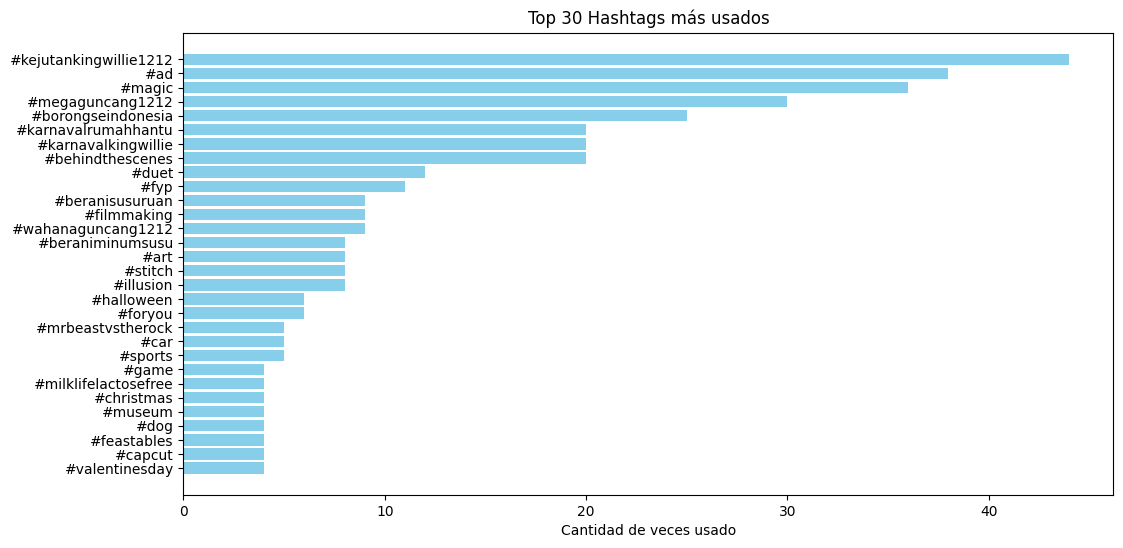

In [18]:
plt.figure(figsize=(12,6))
plt.barh(top30_h['hashtag'], top30_h['cuantos'], color='skyblue')
plt.xlabel('Cantidad de veces usado')
plt.title('Top 30 Hashtags más usados')
plt.gca().invert_yaxis()
plt.show()

Creando categorias tomando en cuenta el top 30

In [19]:
categorias = {
    "Evento/Marca": ["kejutankingwillie1212", "megaguncang1212", "borongseindonesia","karnavalrumahhantu", "karnavalkingwillie", "wahanaguncang1212", "halloween", "christmas", "valentinesday", "mrbeastvstherock"],
    "Publicidad": ["ad", "milklifelactosefree", "feastables"],
    "Entretenimiento": ["magic", "illusion"],
    "Arte/Creatividad": ["art", "filmmaking"],
    "Herramienta/Edición": ["capcut"],
    "Comunidad/Colaboración": ["duet", "stitch"],
    "Comunidad/Retos": ["beranisusuruan", "beraniminumsusu"],
    "Tendencia": ["fyp", "foryou"],
    "Producción": ["behindthescenes"],
    "Temáticas generales": ["car", "sports", "game", "museum", "dog"]
}

In [20]:
def asignar_categoria(lista_hashtags):
    if not lista_hashtags:
        return "Otros"
    for categoria, tags in categorias.items():
        if any(ht.lower().strip("#") in tags for ht in lista_hashtags):
            return categoria
    return "Otros"


In [21]:
tiktok_df['categoria'] = tiktok_df['hashtags'].apply(asignar_categoria)

In [22]:
tiktok_df.sample(7)

,url,digg_count,play_count,share_count,collect_count,comment_count,video_id,author_id,duration,description,create_time,author_unique_id,location_created,description_clean,hashtags,categoria
1936,https://www.tiktok.com/@zachking/video/7451269...,92500.0,2100000.0,1176.0,6231.0,1602.0,7451269645509725483,6.861650e+16,59.0,We worked with the Navy to help bring back a d...,2024-12-22 16:11:55,zachking,US,we worked with the navy to help bring back a d...,[],Otros
666,https://www.tiktok.com/@williesalim/video/7151...,439800.0,6900000.0,3494.0,14836.0,2656.0,7151632066902248731,6.992945e+16,49.0,BORONG TAHU GEJROT GAK MASUK AKAL!! #BorongSeI...,2022-10-07 05:05:03,williesalim,ID,borong tahu gejrot gak masuk akal #borongseind...,"[#borongseindonesia, #bekasi]",Evento/Marca
1763,https://www.tiktok.com/@zachking/video/7428241...,1500000.0,27200000.0,30000.0,68365.0,6430.0,7428241194594880811,6.861650e+16,49.0,Art vs Artist,2024-10-21 14:49:44,zachking,US,art vs artist,[],Otros
472,https://www.tiktok.com/@mrbeast/video/70402038...,1400000.0,11800000.0,3072.0,17120.0,20100.0,7040203854461324550,6.614519e+18,19.0,he said he throws babies everywhere,2021-12-10 22:26:36,mrbeast,US,he said he throws babies everywhere,[],Otros
1535,https://www.tiktok.com/@williesalim/video/7381...,348400.0,6600000.0,2648.0,18377.0,6922.0,7381771039442783494,6.992945e+16,89.0,Alhamdulillah. Terimakasih supportnya 🙏,2024-06-18 09:21:46,williesalim,ID,alhamdulillah terimakasih supportnya,[],Otros
672,https://www.tiktok.com/@williesalim/video/7152...,492300.0,6600000.0,2009.0,22001.0,4677.0,7152875720828554522,6.992945e+16,45.0,bang @Mursid saya fans berat… lezat dan begizi...,2022-10-10 13:31:06,williesalim,ID,bang mursid saya fans berat lezat dan begizi c...,[],Otros
57,https://www.tiktok.com/@zachking/video/6652774...,678800.0,9800000.0,2949.0,1565.0,2006.0,6652774166946647302,6.861650e+16,7.0,Sports aren’t really my thing.... 🏈 What sport...,2019-01-31 21:21:31,zachking,US,sports arent really my thing what sports are ...,[#golong],Otros


In [23]:
df=tiktok_df.groupby('categoria')[['play_count', 'digg_count', 'share_count', 'comment_count', 'collect_count']].mean().sort_values('play_count', ascending=False)
print(df)

                          play_count    digg_count   share_count  \
categoria                                                          
Entretenimiento         8.465250e+07  4.011500e+06  34254.100000   
Arte/Creatividad        6.296154e+07  4.093308e+06  14828.000000   
Producción              4.872727e+07  3.554818e+06   6240.454545   
Temáticas generales     3.932000e+07  3.270027e+06  24529.133333   
Comunidad/Colaboración  3.338421e+07  3.793421e+06  17214.000000   
Publicidad              2.696889e+07  1.904431e+06  11620.400000   
Otros                   1.986087e+07  1.461493e+06  35654.370017   
Evento/Marca            1.764440e+07  1.313635e+06  15018.981481   
Tendencia               9.206250e+06  1.110662e+06   9523.750000   
Comunidad/Retos         8.960000e+06  5.096600e+05  13099.600000   
Herramienta/Edición     8.550000e+06  4.735500e+05   8150.500000   

                        comment_count  collect_count  
categoria                                             
Entre

Obteniendo La tasa de engagement o medida de interacción

In [24]:
tiktok_df["interaccion"] = ((tiktok_df["digg_count"] + tiktok_df["comment_count"] + tiktok_df["share_count"] + tiktok_df["collect_count"])/ 
                                tiktok_df["play_count"]) * 100

In [25]:
print(tiktok_df["interaccion"])

0       50.595235
1       55.154600
2       47.806095
3       46.621192
4       35.231783
          ...    
2055    55.125200
2056    58.100947
2057    44.011647
2058    46.144000
2059    54.617056
Name: interaccion, Length: 2057, dtype: float64


## Tasa de interacción %

In [26]:
e_categoria = (tiktok_df.groupby("categoria")["interaccion"].mean().sort_values(ascending=False)).reset_index()
print(e_categoria)

                 categoria  interaccion
0                Tendencia    14.496816
1          Entretenimiento    12.552195
2   Comunidad/Colaboración    12.362302
3      Temáticas generales     9.340747
4               Producción     9.071374
5                    Otros     8.677077
6               Publicidad     7.803372
7          Comunidad/Retos     7.335910
8         Arte/Creatividad     7.061243
9      Herramienta/Edición     6.427219
10            Evento/Marca     6.082759


C:\Users\hadgu\AppData\Local\Temp\ipykernel_16944\721284364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='interaccion', y='categoria', data=e_categoria, palette='viridis')


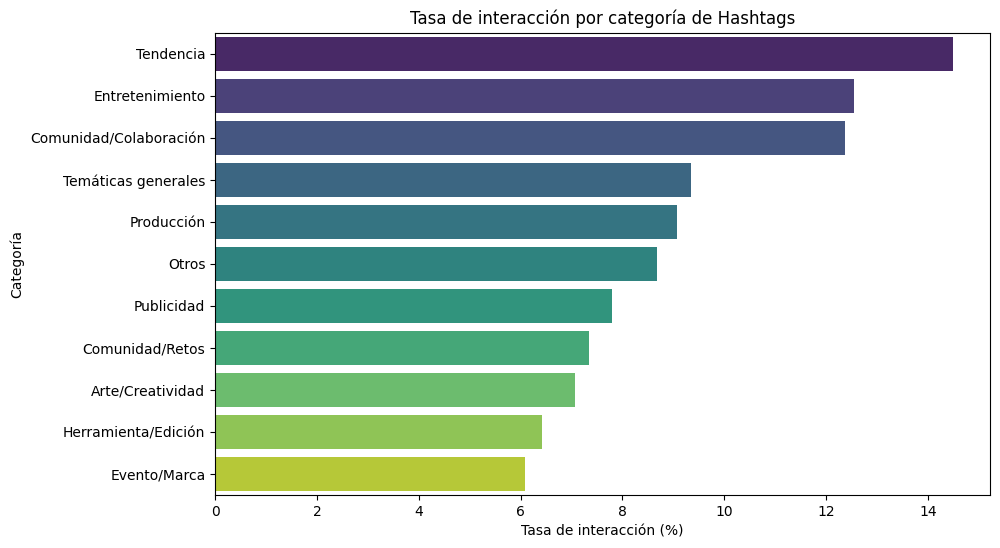

In [27]:

plt.figure(figsize=(10,6))
sns.barplot(x='interaccion', y='categoria', data=e_categoria, palette='viridis')
plt.xlabel('Tasa de interacción (%)')
plt.ylabel('Categoría')
plt.title('Tasa de interacción por categoría de Hashtags')
plt.show()


In [28]:
tiktok_df.columns

Index(['url', 'digg_count', 'play_count', 'share_count', 'collect_count',
       'comment_count', 'video_id', 'author_id', 'duration', 'description',
       'create_time', 'author_unique_id', 'location_created',
       'description_clean', 'hashtags', 'categoria', 'interaccion'],
      dtype='object')

## Histograma de duración del video

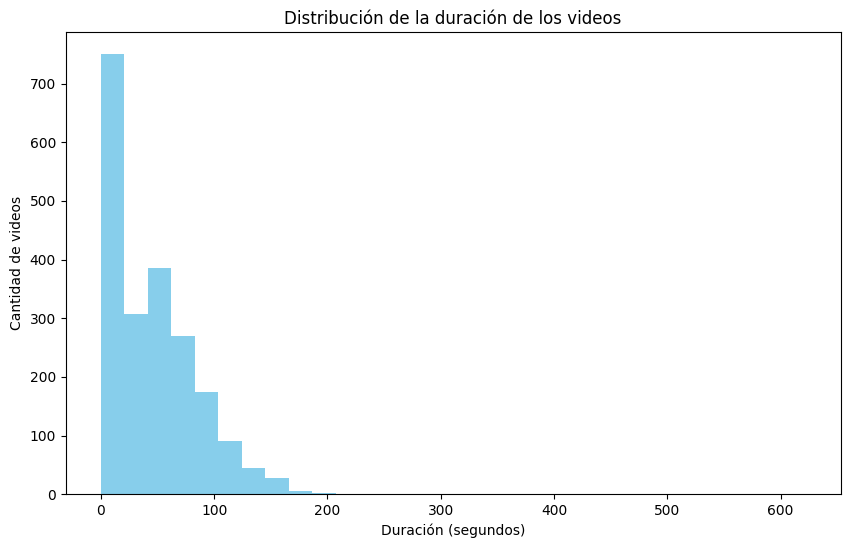

In [29]:
plt.figure(figsize=(10,6))
plt.hist(tiktok_df['duration'], bins=30, color='skyblue')
plt.title('Distribución de la duración de los videos')
plt.xlabel('Duración (segundos)')
plt.ylabel('Cantidad de videos')
plt.show()


Mejorando el grafico

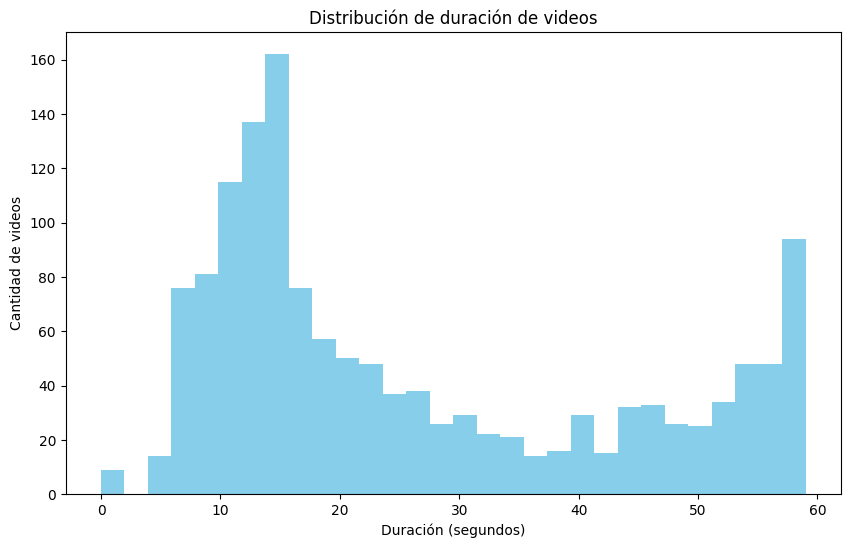

In [30]:
videos_nose = tiktok_df[tiktok_df['duration'] < 60]

plt.figure(figsize=(10,6))
plt.hist(videos_nose['duration'], bins=30, color='skyblue')
plt.title('Distribución de duración de videos')
plt.xlabel('Duración (segundos)')
plt.ylabel('Cantidad de videos')
plt.show()

Podemos ver que son mas frecuentes los vídeos que duran entre 13 y 15 segundos

## Pormedio de duración por categoría

In [31]:
promedio_duracion = tiktok_df.groupby('categoria')['duration'].mean().reset_index()

print(promedio_duracion)

                 categoria   duration
0         Arte/Creatividad  15.538462
1   Comunidad/Colaboración  15.894737
2          Comunidad/Retos  80.200000
3          Entretenimiento  19.825000
4             Evento/Marca  67.481481
5      Herramienta/Edición  16.750000
6                    Otros  47.907917
7               Producción  18.000000
8               Publicidad  31.755556
9      Temáticas generales  20.666667
10               Tendencia  28.250000


C:\Users\hadgu\AppData\Local\Temp\ipykernel_16944\4190369106.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_duracion, x='categoria', y='duration', palette='dark')


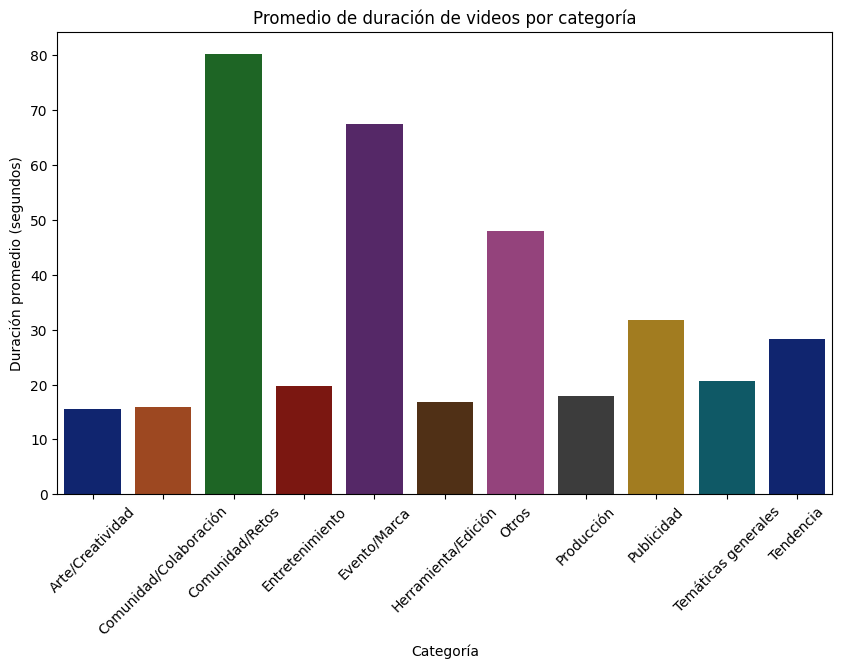

In [32]:
#palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind', 'viridis', 'coolwarm', 'Blues', 'Reds']

plt.figure(figsize=(10,6))
sns.barplot(data=promedio_duracion, x='categoria', y='duration', palette='dark')
plt.xticks(rotation=45)
plt.title('Promedio de duración de videos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Duración promedio (segundos)')
plt.show()

# Conclusiones y Recomendaciones sobre Contenido en TikTok
1. Contenido

Los videos que usan hashtags de las categorías Tendencia, Entretenimiento y Comunidad/Colaboración son los que más interacción generan. Esto quiere decir que a la gente le gusta más este tipo de contenido y participa más con “me gusta”, comentarios, compartidos y colecciones. En cuanto a la cantidad de reproducciones, los videos de Entretenimiento y Arte/Creatividad son los que llegan a más personas. Por otro lado, los videos relacionados con Publicidad, Herramientas de edición y Eventos o Marcas tienen menos interacción, lo que podría indicar que son menos atractivos o parecen más comerciales.

2. Duración ideal para los videos

La mayoría de los videos que mejor funcionan duran entre 13 y 20 segundos. Esto es especialmente cierto para videos de Arte/Creatividad, Comunidad/Colaboración y Entretenimiento. Algunos videos más largos (como los de Comunidad/Retos o Evento/Marca) no tienen tanta interacción, a pesar de durar más tiempo. Por lo tanto, hacer videos cortos, de alrededor de 15 segundos, parece ser una buena estrategia para captar la atención de las personas y lograr que interactúen más.

# Recomendaciones

- Enfocarse en las categorías que funcionan bien: crear más contenido relacionado con tendencias, entretenimiento y colaboraciones para aumentar el alcance y la participación.

- Mantener los videos cortos: preferir videos de entre 13 y 20 segundos para mejorar la retención del usuario.

- Mejorar el contenido menos popular: para los videos de publicidad o herramientas, probar ideas más creativas para hacerlos más atractivos.

- Fomentar la colaboración y la interacción: dado que los videos de colaboración reciben muchos comentarios y colecciones, promover colaboraciones para que el contenido se viralice más rápido.